In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,RocCurveDisplay, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


print("Fetching Data")
df = pd.read_csv("HeartDiseaseTrain-Test.csv", na_values="?") #treat all values with ? as NaN
#transform all features into numerical values so that logistic regression can work
print(df.columns)
print(np.shape(df))
print(df.head())
print("Data fetching completed...")





Fetching Data
Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')
(1025, 14)
   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             

In [31]:
categorical_val = []
continuous_val = []

for columns in df.columns:
    if df[columns].nunique() <= 10:
        categorical_val.append(columns)
    else:
        continuous_val.append(columns)

print(categorical_val)
print(continuous_val)



['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia', 'target']
['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']


In [32]:
#remove sex and target as they are already just categorical data so no need encoding
df["sex"] = df["sex"].map({"Male": 1, "Female": 0})
categorical_val.remove('sex')
categorical_val.remove('target')


print(categorical_val)
print(continuous_val)
df = pd.get_dummies(df, columns=categorical_val,drop_first=True)
df



['chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']
['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']


,age,sex,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,52,1,125,212,168,1.0,0,False,False,True,...,False,False,False,False,False,True,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,True,...,True,False,True,False,False,False,True,False,False,True
2,70,1,145,174,125,2.6,0,False,False,True,...,True,False,True,False,False,False,True,False,False,True
3,61,1,148,203,161,0.0,0,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,1,True,False,False,...,True,False,False,False,False,False,True,False,False,False
1021,60,1,125,258,141,2.8,0,False,False,True,...,True,True,False,True,False,False,False,False,False,True
1022,47,1,110,275,118,1.0,0,False,False,True,...,True,True,False,True,False,False,False,False,False,False
1023,50,0,110,254,159,0.0,1,False,False,True,...,False,False,False,False,False,False,True,False,False,False


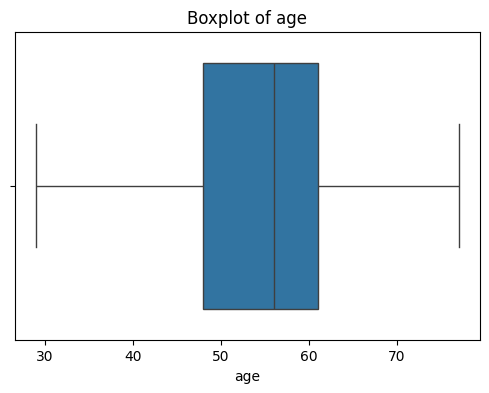

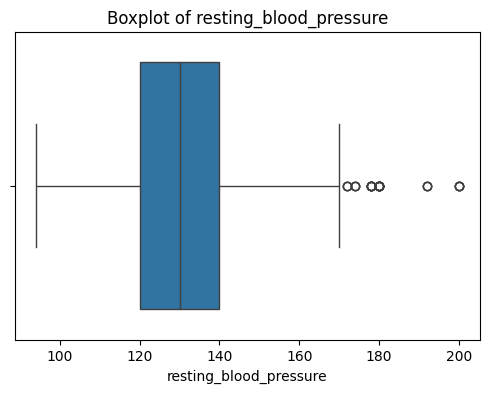

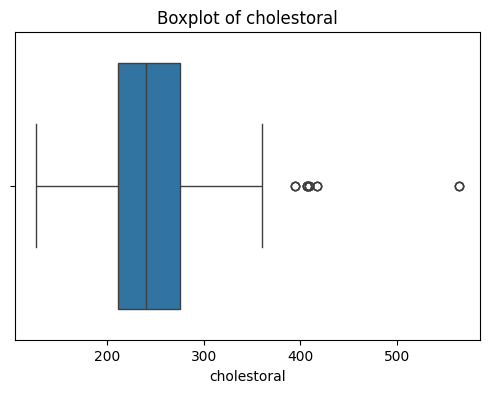

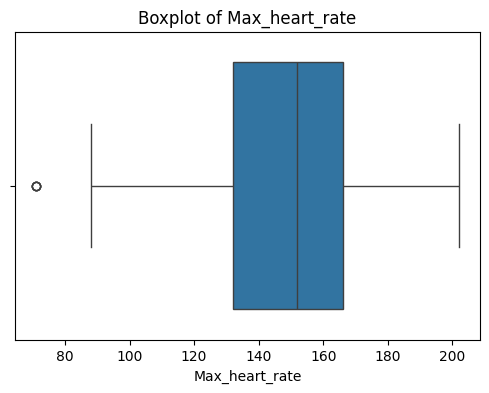

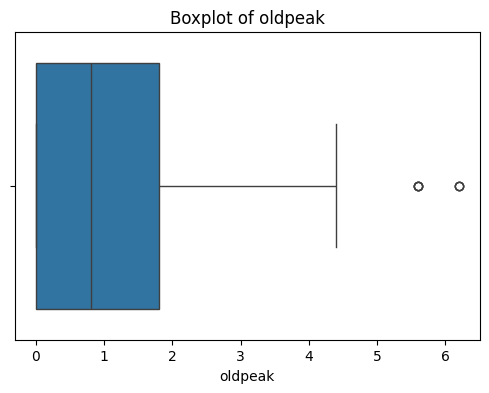

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in continuous_val:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [39]:
for col in continuous_val:
    lower = df[col].quantile(0.03)
    upper = df[col].quantile(0.97)
    df[col] = df[col].clip(lower, upper)


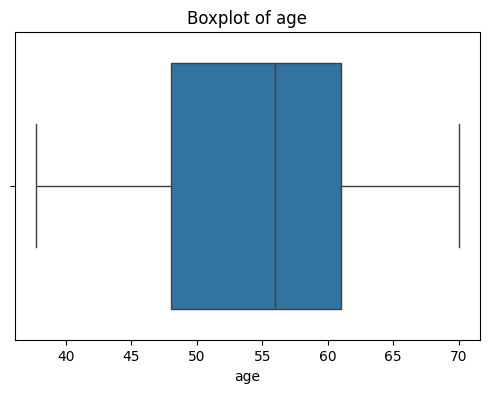

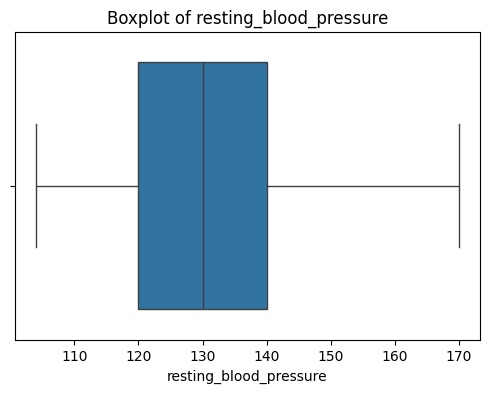

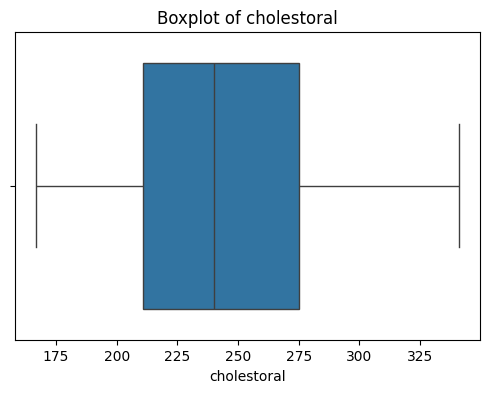

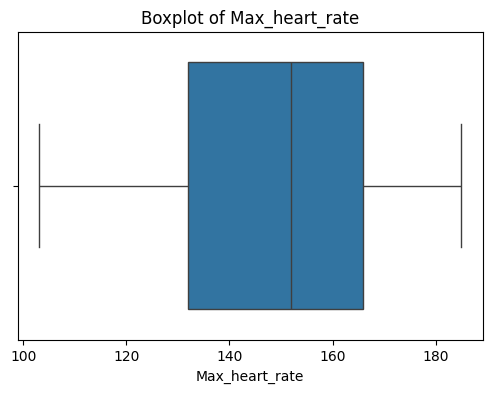

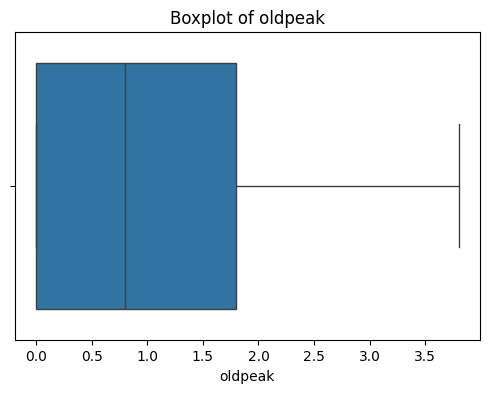

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in continuous_val:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


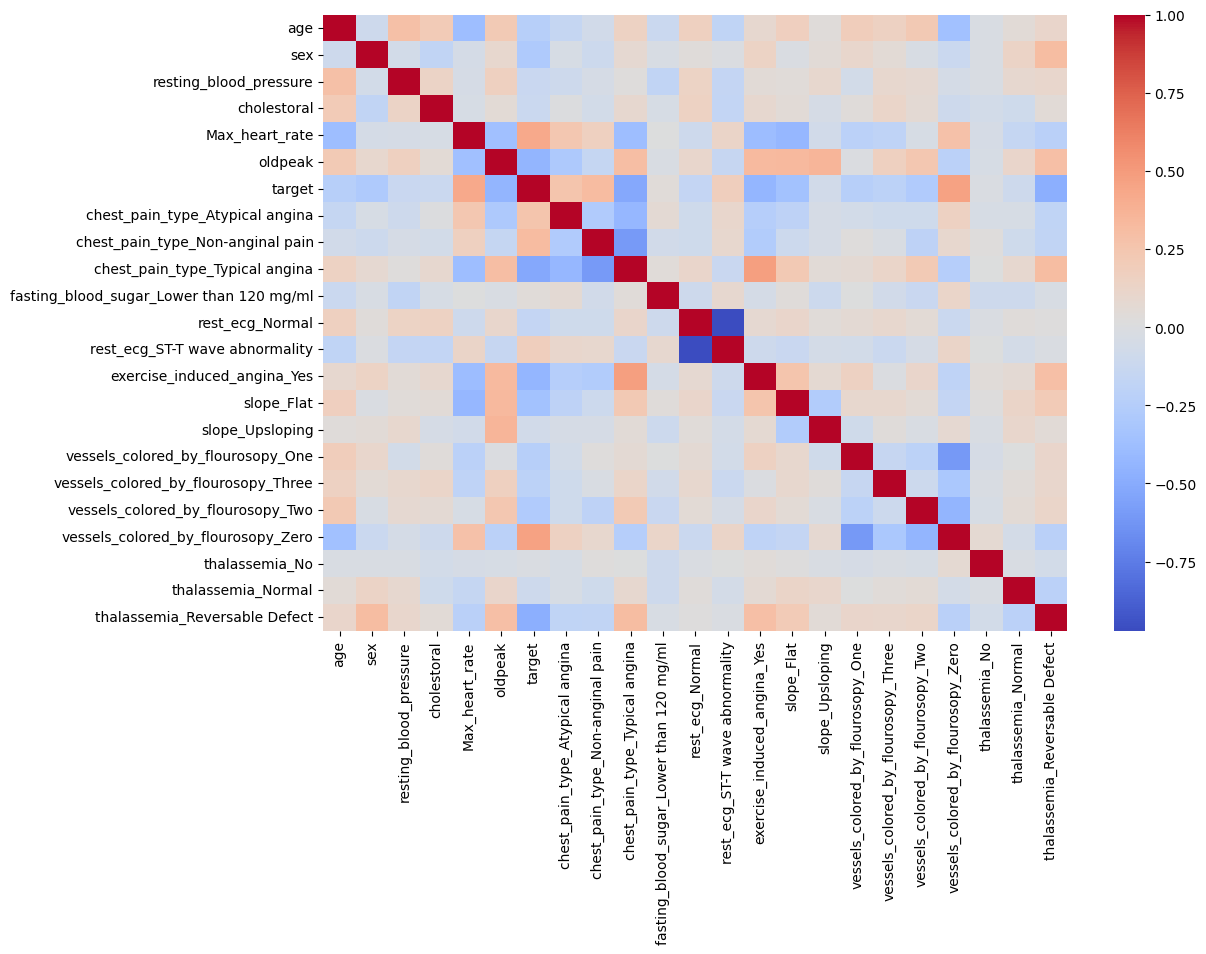

In [41]:
#EXPLAROTARY DATA ANALYSIS
plt.figure(figsize=(12,8))#size of heatmap
sns.heatmap(df.corr(), annot=False, cmap = "coolwarm")
plt.show()


In [42]:

df.dropna(inplace=True)
y = df['target']
x = df.drop(columns=['target'],axis=1) # takes every other column except target
print(np.shape(y))
print(np.shape(x))
df.duplicated().sum()
df.drop_duplicates().shape


(1025,)
(1025, 22)


(302, 23)

In [43]:
#making model
# Split data first
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Scale only continuous columns
scaler = StandardScaler()

x_train[continuous_val] = scaler.fit_transform(x_train[continuous_val])
x_test[continuous_val] = scaler.transform(x_test[continuous_val])

model = LogisticRegression(
    C=2.0,
    max_iter=200,
    solver='liblinear',
    penalty='l2'
)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:,1]

x_test


,age,sex,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,fasting_blood_sugar_Lower than 120 mg/ml,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
527,0.860713,0,-0.458951,-0.785918,0.620383,-0.935667,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
359,-0.159817,0,-0.215129,-0.630525,-1.578669,-0.935667,False,True,False,True,...,False,False,False,False,False,False,True,True,False,False
447,0.066968,1,1.735449,0.990002,-0.204262,-0.206345,False,False,True,True,...,True,True,False,True,False,False,False,False,False,True
31,-0.499993,0,-0.702773,-0.008953,0.574569,0.067151,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
621,-0.726778,1,-0.093217,0.257435,0.024806,-0.935667,False,False,True,False,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,1.541067,1,-0.824684,0.723614,0.070620,-0.024014,False,True,False,True,...,False,False,False,True,False,False,False,False,False,True
796,-1.520523,1,0.211560,-0.919112,-0.799838,-0.935667,True,False,False,True,...,False,True,False,False,False,False,True,False,True,False
644,-1.180347,1,-0.702773,-0.408535,0.895265,-0.935667,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False
404,0.747321,1,0.516338,-0.830316,-0.524957,0.796473,False,False,True,True,...,True,False,False,True,False,False,False,False,False,True


In [44]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro', zero_division=0)
recall = recall_score(y_test, y_pred, average = 'macro', zero_division = 0)
f1 = f1_score(y_test, y_pred, average = 'macro', zero_division = 0)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [45]:
print("METRICS")
print(f"Accuracy: {accuracy*100:.4f}%")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"f1: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

METRICS
Accuracy: 81.4634%
precision: 0.8191
recall: 0.8143
f1: 0.8139
ROC AUC: 0.9028


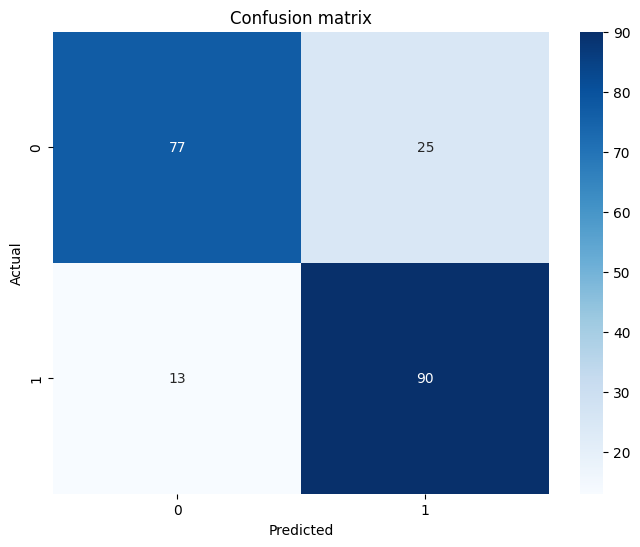

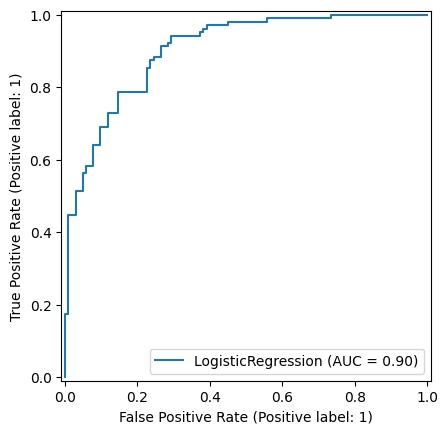

In [46]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.show()

In [47]:

test_score = model.score(x_test, y_test)
train_score = model.score(x_train, y_train)


print(train_score)
print(test_score)
print(classification_report(y_test, y_pred))

0.8768292682926829
0.8146341463414634
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.78      0.87      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, max_depth=2, random_state=42)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)



print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.875609756097561
0.8097560975609757


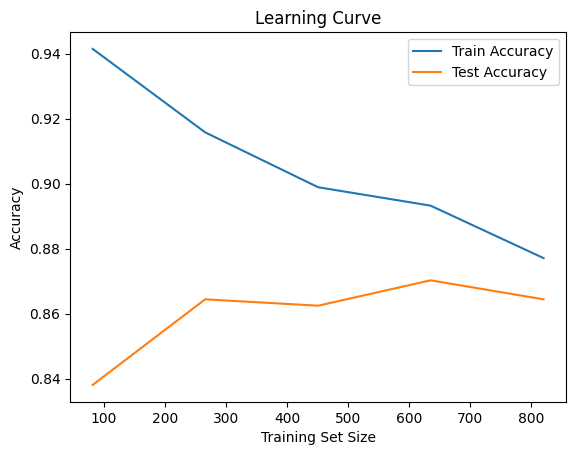

In [12]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, x, y, cv=5, scoring='accuracy')
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train Accuracy')
plt.plot(train_sizes, test_mean, label='Test Accuracy')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [13]:
#ON TO SYNTHETIC DATASET


df_val = pd.read_csv("synthetic_heart_dataset.csv")
df_val = df_val.copy()
categorical_val = []
continuous_val = []

for columns in df.columns:
    if df[columns].nunique() <= 10:
        categorical_val.append(columns)
    else:
        continuous_val.append(columns)

print(categorical_val)
print(continuous_val)

#remove sex and target as they are already just categorical data so no need encoding
df_val["sex"] = df_val["sex"].map({"Male": 1, "Female": 0})
categorical_val.remove('sex')
categorical_val.remove('target')
df = pd.get_dummies(df, columns=categorical_val,drop_first=True)


['sex', 'target', 'chest_pain_type_Atypical angina', 'chest_pain_type_Non-anginal pain', 'chest_pain_type_Typical angina', 'fasting_blood_sugar_Lower than 120 mg/ml', 'rest_ecg_Normal', 'rest_ecg_ST-T wave abnormality', 'exercise_induced_angina_Yes', 'slope_Flat', 'slope_Upsloping', 'vessels_colored_by_flourosopy_One', 'vessels_colored_by_flourosopy_Three', 'vessels_colored_by_flourosopy_Two', 'vessels_colored_by_flourosopy_Zero', 'thalassemia_No', 'thalassemia_Normal', 'thalassemia_Reversable Defect']
['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']


In [14]:

x = df.drop(columns=['target'])
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
x_train[continuous_val] = scaler.fit_transform(x_train[continuous_val])
x_test[continuous_val] = scaler.transform(x_test[continuous_val])

x_val = df.drop(columns=['target'])
y_val = df['target']

#x_val = x_val.reindex(columns=x_train.columns, fill_value=0)
x_val[continuous_val] = scaler.transform(x_val[continuous_val])
print(x_val[continuous_val].describe())


               age  resting_blood_pressure  cholestoral  Max_heart_rate  \
count  1025.000000             1025.000000  1025.000000     1025.000000   
mean     -0.019835               -0.041049    -0.037611       -0.011688   
std       0.997014                0.975544     1.003261        1.018892   
min      -2.814960               -2.135726    -2.371116       -3.471258   
25%      -0.726926               -0.687730    -0.718217       -0.769650   
50%       0.152247               -0.130809    -0.154286        0.116123   
75%       0.701730                0.426113     0.526319        0.736164   
max       2.460075                3.767643     6.146175        2.330555   

           oldpeak  
count  1025.000000  
mean     -0.005435  
std       0.995598  
min      -0.913304  
25%      -0.913304  
50%      -0.235481  
75%       0.611797  
max       4.339823  


In [15]:

model = LogisticRegression(
    C=2.0,
    max_iter=200,
    solver='liblinear',
    penalty='l2'
)

model.fit(x_train, y_train)
y_val_pred = model.predict(x_val)
y_val_prob = model.predict_proba(x_val)[:, 1]

y_val

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [16]:
print(classification_report(y_val, y_val_pred))
print(model.score(x_val, y_val))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       499
           1       0.85      0.90      0.88       526

    accuracy                           0.87      1025
   macro avg       0.87      0.87      0.87      1025
weighted avg       0.87      0.87      0.87      1025

0.8702439024390244


In [17]:
rf = RandomForestClassifier(n_estimators=300, max_depth=2, random_state=42)
rf.fit(x_train, y_train)
rf.score(x_val, y_val)


0.8517073170731707

In [20]:
#compare models with the 2 results 